# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

**NOTE ADDED**: This project is using **PYTHON 3.6** and **scikit-learn 0.19.0**, so this notebook and the **visuals.py** are changed accordingly:

In [1]:
import sys
print("python version is", sys.version)
print('*'*40)
import sklearn
print("sklearn version is", sklearn.__version__)

python version is 3.6.1 |Continuum Analytics, Inc.| (default, May 11 2017, 13:09:58) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
****************************************
sklearn version is 0.19.0


## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [3]:
# Total number of records
n_records = data.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = data[data['income'] == ">50K"].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = data[data['income'] == "<=50K"].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent = 100*n_greater_50k / n_records # in percents

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

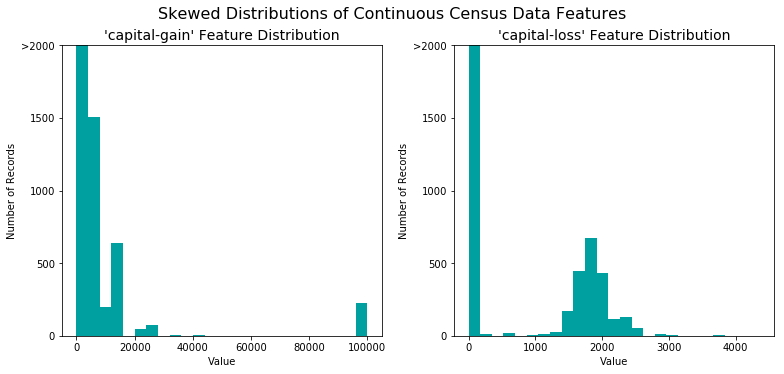

In [4]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

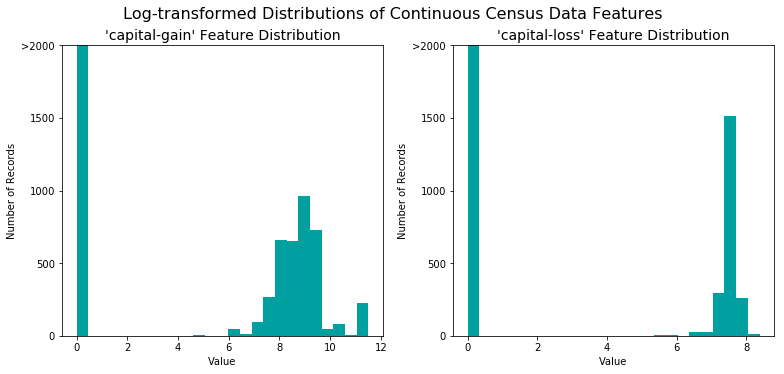

In [5]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [6]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [7]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)
# Encode the 'income_raw' data to numerical values
income_replace_dict = {}
i = 0
for item in income_raw.unique():
    income_replace_dict[item] = i
    i += 1
income = income_raw.replace(income_replace_dict).astype(int)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
print('*'*40)

# Uncomment the following line to see the encoded feature names
print(encoded)

103 total features after one-hot encoding.
****************************************
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [8]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [9]:
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data  
#encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# Calculate accuracy, precision and recall
accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
# HINT: The formula above can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
beta = 0.5
fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


**Answer:** The F$_{0.5}$-score for the naive predictor is quite small (0.29). Naturally, it almost coincides with the score obtained for **training data subset** (which I believe is *more natural* comparator to models described below as it uses the same scoring subset):

In [10]:
TP_train = np.sum(y_train)
FP_train = len(y_train) - TP_train
TN_train = 0
FN_train = 0

accuracy_train = (TP_train+TN_train)/(TP_train+FP_train+TN_train+FN_train)
recall_train = TP_train/(TP_train+FN_train)
precision_train = TP_train/(TP_train+FP_train)
fscore_train = (1 + beta**2) * (precision_train * recall_train) / ((beta**2 * precision_train) + recall_train)
print("Naive Predictor (training subset): [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy_train, fscore_train))

Naive Predictor (training subset): [Accuracy score: 0.2489, F-score: 0.2929]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: ** Interestingly, there are much more binary classification algorithms in the latest **scikit-learn** package, see [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) for details (and even more classification algorithms regardless scikit-learn, according to the [Wikipedia](https://en.wikipedia.org/wiki/Category:Classification_algorithms)):
- Generalized Linear Models ([LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [RidgeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html), [Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html), [PassiveAggressiveClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html))
- Linear and Quadratic Discriminant Analysis ([LinearDiscriminantAnalysis](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html), [QuadraticDiscriminantAnalysis](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html))
- Support Vector Machines ([SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), [NuSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html), [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html))
- Stochastic Gradient Descent ([SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html))
- Nearest Neighbors ([KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [RadiusNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html))
- Gaussian Processes ([GaussianProcessClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html))
- Naive Bayes ([GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), [MultinomialNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html), [BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html))
- Decision Trees ([DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
- Ensemble methods ([BaggingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [ExtraTreesClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html), [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), [VotingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html))
- Neural Networks ([MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)).

Being inspired by the [scikit-learn algorithm cheat-sheet](http://scikit-learn.org/stable/_static/ml_map.png), I would expect that [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
should be the best applicable model to our binary classification problem with ~45k samples and ~100 features. Also, being aware of the [No Free Lunch theorem](http://www.mitpressjournals.org/doi/abs/10.1162/neco.1996.8.7.1341), it makes sense to consider some other models beyond [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html), for example, [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (I do not think that [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) will work well on our data because of the [curse of dimensionality](https://www.quora.com/Does-kNN-k-Nearest-Neighbors-suffer-from-the-curse-of-dimensionality-and-if-it-does-how-so)). Also, it makes sense to consider [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html): [unlike](http://scikit-learn.org/stable/modules/svm.html#complexity) [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html), it scales [linearly](http://scikit-learn.org/stable/modules/sgd.html#complexity) with the number of training examples.

Below I summarize fundamental properties of each selected classifier:

[LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) :
- Some real-world applications in binary classification problems: [Predicting popularity of CMS dataset](https://arxiv.org/abs/1602.07226), [Electricity Theft Detection using Machine Learning](https://arxiv.org/abs/1708.05907), [Labeling Fashion-MNIST picture dataset from Zalando](https://arxiv.org/abs/1708.07747) and [Malware Classification](https://arxiv.org/abs/1705.02268).
- Some advantages of SVMs [are shown here](https://stats.stackexchange.com/questions/24437/advantages-and-disadvantages-of-svm); note that [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) **does not have kernel trick** because of its linearity. In my view, the most significant advantage is that [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) is [convex](https://math.stackexchange.com/questions/1127464/how-to-show-that-svm-is-convex-problem).
- A critical weakness of [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) (as well as of the other SVM methods) is that its computing time [scales polynomially with the size of the dataset](http://scikit-learn.org/stable/modules/svm.html#complexity) due to **quadratic programming**. For the sufficiently large problems and a large amount of RAM available, [it is advised to increase the cache size](http://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use) to accelerate computations. Naturally, [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) does not work well when the data are not linearly separable so that the ["kernel trick"](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html) cannot be used; in this case, [SVC with nonlinear kernel should be used instead](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html). Also, it is reported that SVM algorithms ["can be painfully inefficient to train."](https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms)
- [scikit-learn algorithm cheat-sheet](http://scikit-learn.org/stable/_static/ml_map.png) ensures that [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) can be the best model given specific parameters of the problem (binary classification for ~45k samples of labeled data). It is unclear, however, whether  the [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) algorithm is suitable for our specific problem: in addition to the [No Free Lunch theorem](http://www.mitpressjournals.org/doi/abs/10.1162/neco.1996.8.7.1341), we do not know whether our data is linearly separable. Therefore, considering the [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) as a reasonable starting point, we should compare it with other algorithms which lie further in [scikit-learn algorithm cheat-sheet](http://scikit-learn.org/stable/_static/ml_map.png).

[SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) :
- [Predicting popularity of CMS dataset](https://arxiv.org/abs/1602.07226), [Labeling Fashion-MNIST picture dataset from Zalando](https://arxiv.org/abs/1708.07747)
- It is known that [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) scales [linearly](http://scikit-learn.org/stable/modules/sgd.html#complexity) with the number of training examples. Therefore, it should be better suited for classification of very large datasets than, e.g., [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html).
- Similar to [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html), [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) is a **linear** algorithm, so it should not perform well if data is not linearly separable (which we do not know at this stage).
- According to [scikit-learn algorithm cheat-sheet](http://scikit-learn.org/stable/_static/ml_map.png), [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) is naively the best algorithm for predicting a category for > 100k samples of labeled data. Indeed, as [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) scales [linearly](http://scikit-learn.org/stable/modules/sgd.html#complexity) with the number of training examples, it should **outperform** [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) for very large number of samples. Because we have ~45k samples, quite close to "decision border" of [scikit-learn algorithm cheat-sheet](http://scikit-learn.org/stable/_static/ml_map.png) (100k samples), it is advisable to test [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) algorithm as well.

[RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) :
- Some real-world applications in binary classification problems: [Predicting popularity of CMS dataset](https://arxiv.org/abs/1602.07226), [Electricity Theft Detection using Machine Learning](https://arxiv.org/abs/1708.05907), [Labeling Fashion-MNIST picture dataset from Zalando](https://arxiv.org/abs/1708.07747) and [Predicting the Onset of Type II Diabetes](https://arxiv.org/abs/1708.07480). 
- Unlike [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) and [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html), [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) is an **ensemble method**, so I expect that it can provide more realistic decision border, [see, e.g.](https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms).
- The main [weakness](http://scikit-learn.org/stable/modules/tree.html) of [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) is its tendency of overfit the data and thus requires efficient tree pruning technique.
- According to [scikit-learn algorithm cheat-sheet](http://scikit-learn.org/stable/_static/ml_map.png), [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) is one of recommended classification algorithms for the sufficiently small number of samples (< 100k, consistent with ~45k samples in our data) in case if **both** [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) and [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) will not work well. This can be expected because our data may not be linearly separable (with turns out to be a problem for [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)) and are multidimensional (which creates difficulties for [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [11]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:], y_train[:])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

LinearSVC trained on 361 samples.
LinearSVC trained on 3617 samples.
LinearSVC trained on 36177 samples.
SGDClassifier trained on 361 samples.
SGDClassifier trained on 3617 samples.
SGDClassifier trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.


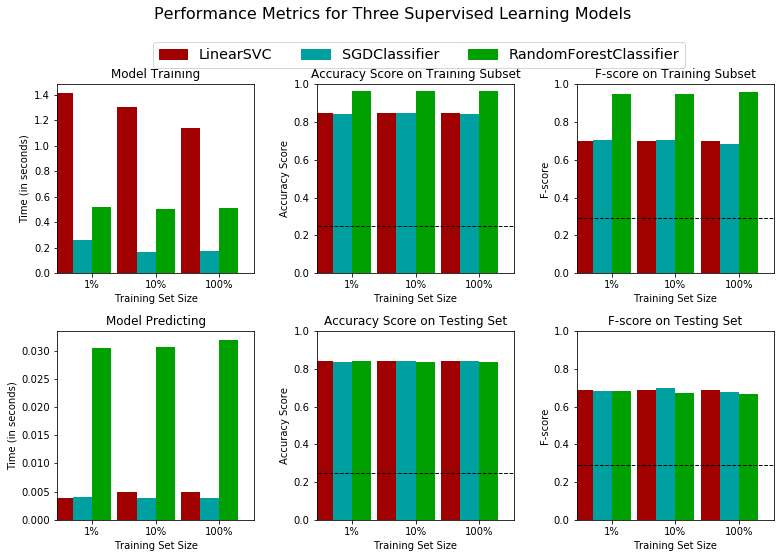

In [12]:
# Import the three supervised learning models from sklearn
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the three models

clf_A = LinearSVC() # long training time
clf_B = SGDClassifier(max_iter=1000, tol=1e-3) # using default parameters planned for future scikit-learn 0.21
clf_C = RandomForestClassifier() #normal accuracy but larger training and predicting times compared to LogReg and SGD


# Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = int(samples_100 / 10)
samples_1 = int(samples_100 / 100)


# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: ** For this dataset, all three models produce approximately the same F$_{0.5}$ score on the testing dataset (using 100% of the training dataset); while [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) (Model B) seem produces slightly higher F$_{0.5}$ score, **this increase is not significant after cross-validation**:

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

f_scorer = make_scorer(fbeta_score, beta=0.5)
scores_A = cross_val_score(clf_A, X_test, y_test, scoring=f_scorer, cv=10)
print("Model A, F0.5 score (testing): %0.4f (+/- %0.4f) (1 sigma)" % (scores_A.mean(), scores_A.std() * 1)) # 68% confidence
scores_B = cross_val_score(clf_B, X_test, y_test, scoring=f_scorer, cv=10)
print("Model B, F0.5 score (testing): %0.4f (+/- %0.4f) (1 sigma)" % (scores_B.mean(), scores_B.std() * 1)) # 68% confidence
scores_C = cross_val_score(clf_C, X_test, y_test, scoring=f_scorer, cv=10)
print("Model C, F0.5 score (testing): %0.4f (+/- %0.4f) (1 sigma)" % (scores_C.mean(), scores_C.std() * 1)) # 68% confidence


Model A, F0.5 score (testing): 0.6771 (+/- 0.0270) (1 sigma)
Model B, F0.5 score (testing): 0.6326 (+/- 0.0493) (1 sigma)
Model C, F0.5 score (testing): 0.6633 (+/- 0.0371) (1 sigma)


Given the obtained **equality in final F$_{0.5}$ scores within 1$\sigma$ errorbars** and the **suitability of all three models** for the given data set, we **cannot** choose the best model. Instead, we should proceed to **tune all three of them**.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** Because we cannot prefer any models from our set due to their F$_{0.5}$ score equality after cross-validation, I proceed with describing **all three selected models** in layman's terms:

- [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) (Model A) finds an *optimal linear border* which separates samples of two or more different classes in a training dataset. First, such a border should provide an adequate **accuracy** (the percentage of samples that are classified correctly). Second, in case of accurate classification, the border should be located at the **maximal distance** from each group to avoid overfitting. An example of ternary classification (an analog of binary classification for 3 different classes) made with [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) is [iris dataset](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html).

- [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) (Model B) is very similar to the [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) but uses another method, [Stochastic Gradient Descent](http://scikit-learn.org/stable/modules/sgd.html#sgd), to calculate the *optimal linear border* between different classes. Gradient descent is just a technique to find a  minimum for a function of one or more variables. When we start from a given point, standard gradient descent calculates the direction where the function minimizes in the fastest way (i.e. finds a **gradient)**, make a "step" in this direction, then calculates the gradient again until the minimum is found. When the number of variables is very large (e.g. if we want to find a border that separates two classes for large datasets), standard gradient descent is computationally expensive, and its alternative version (computation of a gradient by using not a whole number of possible directions, but a **stochastically chosen subset of directions**) is used instead. 

- [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (Model C) generates **average** (hence the name *forest*) output from multiple **[decision trees](https://en.wikipedia.org/wiki/Decision_tree)**. Usage of decision trees allows creating [*nonlinear* selection borders](http://scikit-learn.org/stable/modules/tree.html). To accelerate the computations, decision trees are built using [random subspace method](https://en.wikipedia.org/wiki/Random_subspace_method), hence the name *random*.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [14]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV, ShuffleSplit 
from sklearn.metrics import make_scorer

In [15]:
# Model A (LinearSVC)

start = time() # Get start time
# Initialize the classifier
clf_B = LinearSVC() # increased max_iter

# Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters =  {}
parameters['C'] = np.logspace(-3, 3, 7)
parameters['tol'] = np.logspace(-4, -2, 3)
parameters['max_iter'] = np.logspace(2, 4, 3)

print(parameters)
num = 1
for item in parameters:
    num *= len(parameters[item])
#    print(item, len(parameters[item]))
print('*'*40)
print("Number of parameters is", num)
print('*'*40)

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.2, train_size=None, random_state = 0)
cv_sets.get_n_splits(income)


grid_obj = GridSearchCV(clf_A, param_grid=parameters, scoring = scorer, cv = cv_sets)

    
# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf_A = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions_A = (clf_A.fit(X_train, y_train)).predict(X_test)
best_predictions_A = best_clf_A.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions_A)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions_A, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions_A)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions_A, beta = 0.5)))
end = time() # Get end time
    
print("Time is", end - start)

print(best_clf_A)

{'C': array([  1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
         1.00000000e+03]), 'tol': array([ 0.0001,  0.001 ,  0.01  ]), 'max_iter': array([   100.,   1000.,  10000.])}
****************************************
Number of parameters is 63
****************************************
Unoptimized model
------
Accuracy score on testing data: 0.8427
F-score on testing data: 0.6856

Optimized Model
------
Final accuracy score on the testing data: 0.8430
Final F-score on the testing data: 0.6874
Time is 2842.543994665146
LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100.0,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [16]:
# Model B (SGDClassifier)

start = time() # Get start time
# Initialize the classifier
clf_B = SGDClassifier(max_iter = 1000, tol=1e-3) # increased max_iter

# Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters =  {}
parameters['loss'] = ['hinge', 
                      'log', 
                      'modified_huber', 
                      'squared_hinge', 
                      'perceptron', 
                      'squared_loss', 
                      'huber', 
                      'epsilon_insensitive', 
                      'squared_epsilon_insensitive']
parameters['l1_ratio'] = np.linspace(0.0, 1.0, 5)
parameters['alpha'] = np.logspace(-9, -4, 5)

print(parameters)
num = 1
for item in parameters:
    num *= len(parameters[item])
#    print(item, len(parameters[item]))
print('*'*40)
print("Number of parameters is", num)
print('*'*40)


# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.2, train_size=None, random_state = 0)
cv_sets.get_n_splits(income)


grid_obj = GridSearchCV(clf_B, param_grid=parameters, scoring = scorer, cv = cv_sets)

    
# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf_B = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions_B = (clf_B.fit(X_train, y_train)).predict(X_test)
best_predictions_B = best_clf_B.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions_B)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions_B, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions_B)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions_B, beta = 0.5)))
end = time() # Get end time
    
print("Time is", end - start)

print(best_clf_B)

{'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 'l1_ratio': array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ]), 'alpha': array([  1.00000000e-09,   1.77827941e-08,   3.16227766e-07,
         5.62341325e-06,   1.00000000e-04])}
****************************************
Number of parameters is 225
****************************************
Unoptimized model
------
Accuracy score on testing data: 0.8363
F-score on testing data: 0.6656

Optimized Model
------
Final accuracy score on the testing data: 0.8398
Final F-score on the testing data: 0.6814
Time is 2853.579879760742
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.5, learning_rate='optimal',
       loss='hinge', max_iter=1000, n_iter=None, n_jobs=1, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001, verbose=0,
       warm_start=False)


In [17]:
# Model C (RandomForestClassifier)

start = time() # Get start time
# Initialize the classifier
clf_C = RandomForestClassifier() # increased max_iter

# Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters =  {}
parameters['criterion'] = ['gini', 
                      'entropy']
parameters['max_features'] = ['sqrt',
                             'log2']
parameters['n_estimators'] = np.logspace(0, 3, 10, dtype=int)

print(parameters)
num = 1
for item in parameters:
    num *= len(parameters[item])
#    print(item, len(parameters[item]))
print('*'*40)
print("Number of parameters is", num)
print('*'*40)


# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.2, train_size=None, random_state = 0)
cv_sets.get_n_splits(income)


grid_obj = GridSearchCV(clf_C, param_grid=parameters, scoring = scorer, cv = cv_sets)

    
# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf_C = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions_C = (clf_C.fit(X_train, y_train)).predict(X_test)
best_predictions_C = best_clf_C.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions_C)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions_C, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions_C)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions_C, beta = 0.5)))
end = time() # Get end time
    
print("Time is", end - start)

print(best_clf_C)

{'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2'], 'n_estimators': array([   1,    2,    4,   10,   21,   46,  100,  215,  464, 1000])}
****************************************
Number of parameters is 40
****************************************
Unoptimized model
------
Accuracy score on testing data: 0.8389
F-score on testing data: 0.6744

Optimized Model
------
Final accuracy score on the testing data: 0.8426
Final F-score on the testing data: 0.6818
Time is 3719.2490670681
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |        0.2478       |      0.8427       |     0.8430      |
| F-score        |        0.2917       |      0.6856       |     0.6874      |


**Answer: ** After model tuning, it appears that Model A (LinearSVC) gives slightly better accuracy (0.8430) and F-score (0.6874) than two other models. Tuning of Model A very slightly (< 0.002) increased the accuracy and F-score; for models B and C, the corresponding increase is about 0.01-0.02 (as expected, tuning produces better scores). Not surprisingly, both unoptimized and optimized models scores are much better than the naive predictor benchmarks.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:** The simplest method to idenntify the most inmportant features is to compare the correlation of X_train columns with 'income' column:

In [68]:
train_1 = pd.DataFrame(data = X_train)
train_1['income'] = y_train
np.abs(train_1.corr()['income'].sort_values(ascending=False).head(10))

income                                1.000000
marital-status_ Married-civ-spouse    0.447718
relationship_ Husband                 0.404928
education-num                         0.333557
capital-gain                          0.288062
age                                   0.234389
hours-per-week                        0.225825
sex_ Male                             0.216530
occupation_ Exec-managerial           0.210372
education_level_ Bachelors            0.181495
Name: income, dtype: float64

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

So it looks like top-5 features should be:
- **marital-status\_ Married-civ-spouse** (rather unexpected);
- **relationship\_ Husband** (a consequence of gender inequality);
- **education-num** (very motivating: more educations means larger salary);
- **age** (usually correlates with professional experience);
- **capital-gain** (earn more means earn more).

However, **relationship\_ Husband** very strongly correlated with **marital-status\_ Married-civ-spouse** :

In [70]:
np.abs(train_1.corr()['relationship_ Husband'].sort_values(ascending=False).head(10))

relationship_ Husband                 1.000000
marital-status_ Married-civ-spouse    0.897580
sex_ Male                             0.582592
income                                0.404928
age                                   0.305097
hours-per-week                        0.255591
occupation_ Craft-repair              0.162499
workclass_ Self-emp-not-inc           0.122070
race_ White                           0.119964
workclass_ Self-emp-inc               0.116430
Name: relationship_ Husband, dtype: float64

so I would assume that importance of **relationship\_ Husband** should be almost fully absorbed into **marital-status\_ Married-civ-spouse** column and thus should be changed by **hours-per-week**.

Therefore, my final top-5 features are:

- **marital-status\_ Married-civ-spouse** (rather unexpected);
- **education-num** (very motivating: more educations means larger salary);
- **age** (usually correlates with professional experience);
- **capital-gain** (earn more means earn more);
- **hours-per-week** (work more mean earn more).

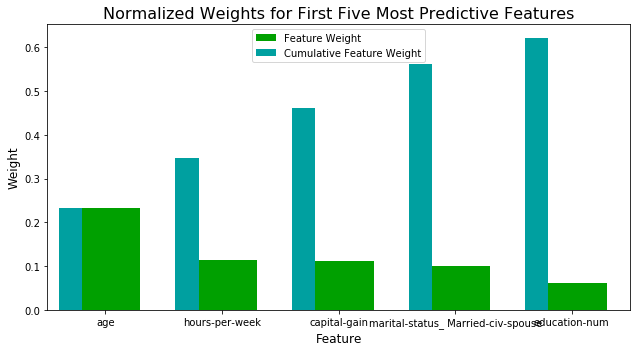

In [18]:
# Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier

# Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier().fit(X_train, y_train)
#model = AdaBoostClassifier().fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:** There is only a slight difference between extracted feature importance and my final expectations: top-5 feature list coincides although the relative feature weights are different. For example, the weight of **marital-status\_ Married-civ-spouse** is smaller, this may be due to the fact that only 46.6% samples has Married-civ-spouse martial status:

In [75]:
np.sum(train_1['marital-status_ Married-civ-spouse'].astype(bool)) / train_1.shape[0]

0.46634602095253891

For example, the **age** column is specified for 98.9% samples:

In [76]:
np.sum(train_1['age'].astype(bool)) / train_1.shape[0]

0.98919202808414186

which should enhance its relative importance.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [19]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf_A)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions_A)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions_A, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8430
F-score on testing data: 0.6874

Final Model trained on reduced data
------
Accuracy on testing data: 0.8284
F-score on testing data: 0.6539


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:** Interestingly, both F-score and accuracy score decreased **by only a small value** (0.02-0.03), close to typical 1$\sigma$ error obtained from cross-valudation (see above). Therefore, it **makes sence to consider this reduced dataset as our training set** given the reduced amount of training time.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.